In [1]:
#we are carring out data cleaning
#price is my dependent varaiable
#we are using supervised learning whoch must be made up of tagged or labelled data set
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
#reading our csv file into a pandas data frame (df)
df1 = pd.read_csv("realestatedata.csv")

In [3]:
df1.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [4]:
#Number of rows and columns in our dataset
df1.shape

(13320, 9)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
#examining the area type feature we'll print a count of data sampling in each of this area type categories. 
#group  by area type and aggregate count
df1.groupby('area_type')["area_type"].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
#all columns are important but let us just drop area_type, society, balcony, availability
df2 = df1.drop(["area_type", "society", "availability", "balcony"], axis="columns")
df2.shape

(13320, 5)

In [8]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
#Data  cleaning process begins from here
#starts by handling the n values using isnull function
#will show u number of rows where values are null (0)
#we have 73 rows where the number of bath is not available
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
#here we can drop the rows with null/na values since the size is small in 
#comparison to the total datset available
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df3.shape

(13246, 5)

In [12]:
#trying to differentiate bhk and bedroom
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df3["bhk"] = df3["size"].apply(lambda x: int(x.split(' ')[0]))

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [15]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [16]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [17]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [19]:
df3[~df3["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [20]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
       return  (float(tokens[0])+float(tokens[1]))/2
    try: 
        return float(x)
    except:
        return None

In [21]:
convert_sqft_to_num("2166")

2166.0

In [22]:
convert_sqft_to_num("2100 - 2850")

2475.0

In [23]:
convert_sqft_to_num("34.46Sq. Meter")

In [24]:
#applying our function which converts all values with a range to a number that is the median of the two numbers
#in apply we can write a lambda function or native python function or call a prewritten python funtion
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [25]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [26]:
(2100+2850)/2    

2475.0

In [27]:
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [28]:
#This copies our old dataframe into a new one
df5 = df4.copy()

#Feature Engineering is helpful for outlier detection, cleaning and removal in the later stage
#Craeating the price per sqft column
df5['price_per_sqft'] = df5['price']* 100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [29]:
#We are exploring the location column by checking how many locations are there and how many rows are available in the 
#data set for location. 
#location is  a categorical feature because it is a tax data and if we have too many locations, it can create a problem
#finding the total number of locations
#too many features is called dimensionality cause.
#the technique we will use is by coming up with an alter category

len(df5.location.unique())

1304

In [30]:
#We are stripping any extra spaces from the location using the lambda function to make sure our data is clean
df5.location = df5.location.apply(lambda x: x.strip())

In [31]:
#getting the stats on the location data
#we want to group our data frame by using locationa nd whatever i get as a result on that, 
#give me a location column on which i will perform agg funcgtion wjhich will give me a count for the location
location_stats = df5.groupby("location")["location"].agg("count")
location_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64

In [32]:
#getting the stats on the location data
#we want to group our data frame by using locationa nd whatever i get as a result on that, give me a location column on 
#which i will perform aggregate function wjhich will give me a count for the location
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [33]:
#Any location with less than 10 data ppoints should be called other location. and this is possible since our
#location stats is in series
len(location_stats[location_stats<10])

1039

In [34]:
location_stats_less_than_10 = location_stats[location_stats<10]
location_stats_less_than_10

location
Chandra Layout        9
Jakkur Plantation     9
2nd Phase JP Nagar    9
Yemlur                9
Mathikere             9
                     ..
LIC Colony            1
Kuvempu Layout        1
Kumbhena Agrahara     1
Kudlu Village,        1
1 Annasandrapalya     1
Name: location, Length: 1039, dtype: int64

In [35]:
len(df5.location.unique())

1293

In [36]:
#Applying a lambda function to convert all locations in the location column less than 10 to other
df5.location = df5.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

255

In [37]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [38]:
#Outlier Detection and Removal. Outliers are the data points that are errors. 
#They sometimes represent the extreme variation data set. Although they are valid, it makes sense to remove them, otherwise they may create some isssues later.
#We can make use of standard deviation or simple domain knowledge to remove this outliers
#typical sqft per bedroom is around 300sqft
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [39]:
df5.shape

(13246, 7)

In [40]:
#To filter the rows as we remove outliers
#This basically negates the function to remove all bhk_size with total sqft less than 300 from our df and 
#save it in a new data frame
df6 = df5[~ (df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

In [41]:
#Summary Statistics of our Dataframe
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [42]:
#we have to remove excessive/extreme cases from our data frame
#writing a function to remove such excesses using standard deviaition
#function to remove price per_sqft_outliers per location
#finding mean and standard deviation aper location and filter out an data points which are beyond 1standard deviation.
#We are assuming that our data set has a normal distributution, so 68% data pooints should lie between mean and 1std
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape
    
#taking df as an input
#grouping them by location
#per location we get a sub_df for which we are calculating m=mean and st = standard deviation
#we are filtering all the data points beyond the sd which means any price_per_Sqft in our subdf above m-st 
#(mean-1standard deviartion) and less than or = to m+st, we will keep it in our reduced  
#this will run continouly in the for loop

(10222, 7)

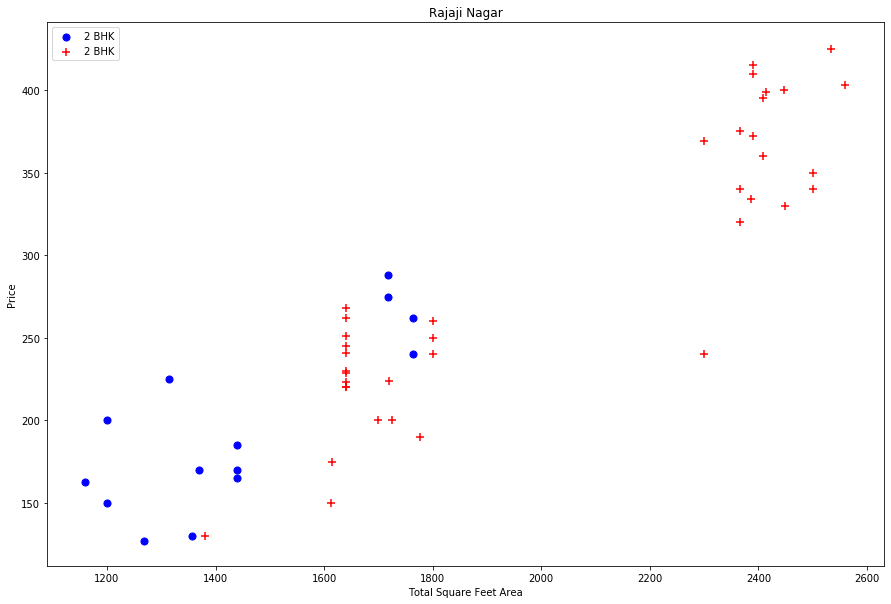

In [43]:
#next looking at whether the property prices for 3bhk are more than the price for 2bhk or not for thesame sqft area 
#using a function to show a visualisation of a scatter plot on which it will plot price against 3bhk and 2bhk apparrtments
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.rcParams["figure.figsize"] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price, color = "blue", label = "2 BHK", s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price, color = "red", marker= "+", label = "2 BHK", s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7, "Rajaji Nagar")

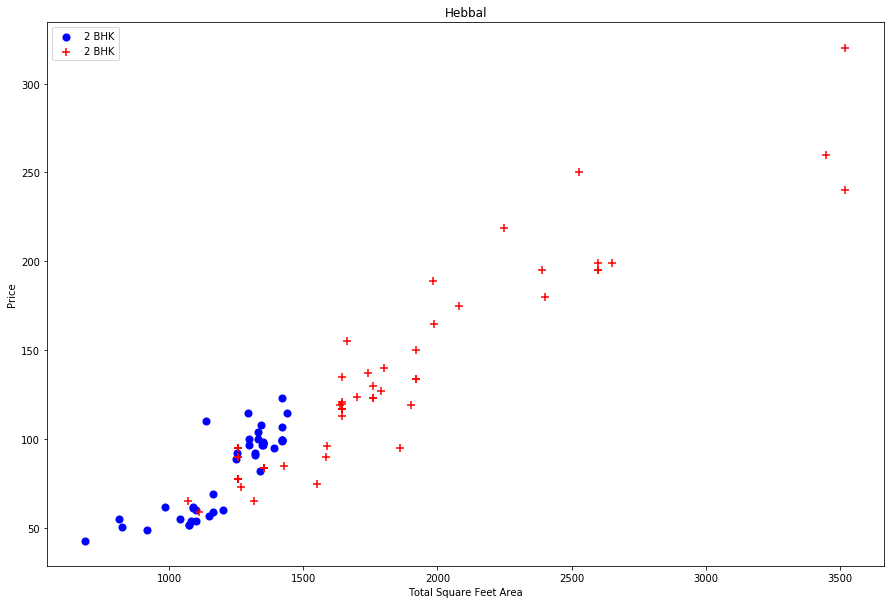

In [44]:
plot_scatter_chart(df7, "Hebbal")

In [45]:
#this function will build a dictionary of stats per bhk to remove properties where for same location, 
#the price of  e.g. 3 bedrrom apartment is less than 2 bedroom apartment (with thesame or near sqft area.)
#removing those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment using this function
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby("location"):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk] = {
                "mean": np.mean(bhk_df.price_per_sqft),
                "std": np.std(bhk_df.price_per_sqft),
                "count": bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby("bhk"):
            stats = bhk_stats.get(bhk-1)
            if stats and stats["count"]>5:
                exclude_indices = np.append (exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats["mean"])].index.values)
    return df.drop(exclude_indices,axis="index")

df8 =  remove_bhk_outliers(df7)
df8.shape

(7369, 7)

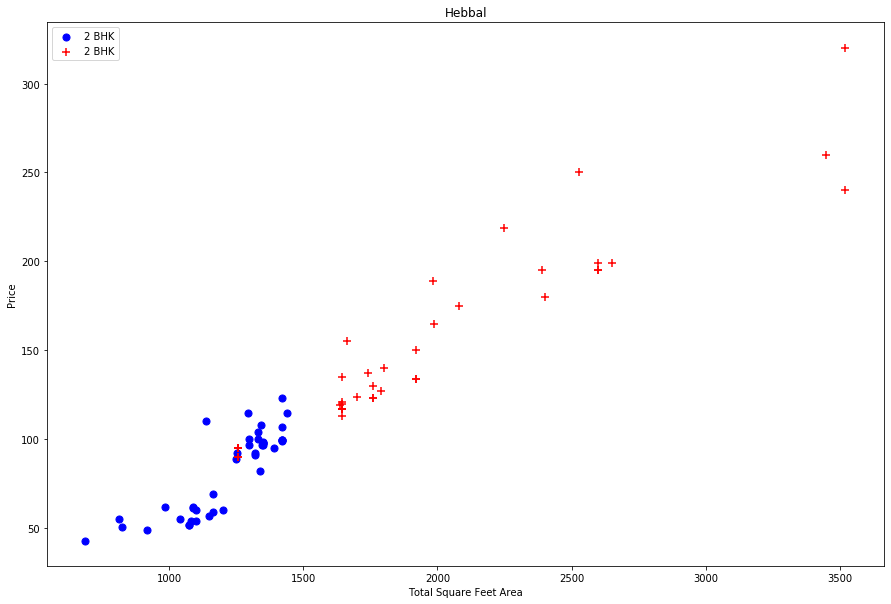

In [46]:
plot_scatter_chart(df8, "Hebbal")

Text(0, 0.5, 'Count')

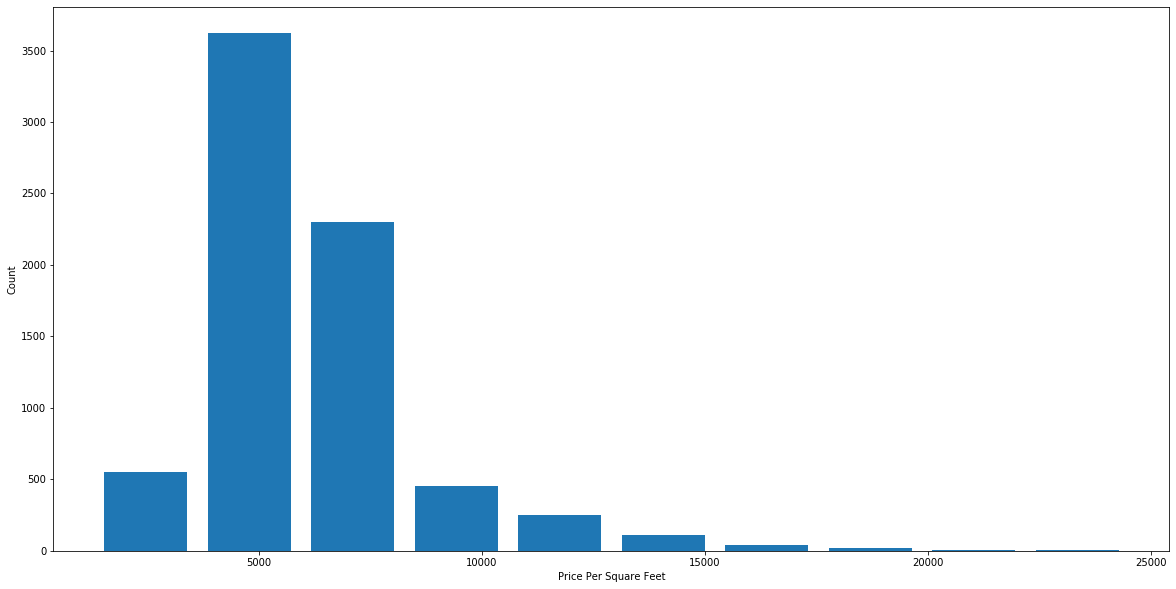

In [47]:
#plotting a histogram to see how many properties we have per_sqft
plt.rcParams["figure.figsize"] = (20,10)
#rwidth defines the size of the histogram
plt.hist(df8.price_per_sqft,rwidth = 0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
#Our histogram has a normal distribution/gaussian curve

In [48]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6., 14.,  7.,  9., 12., 16., 13.])

In [49]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
585,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
5344,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8547,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8633,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9329,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9642,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

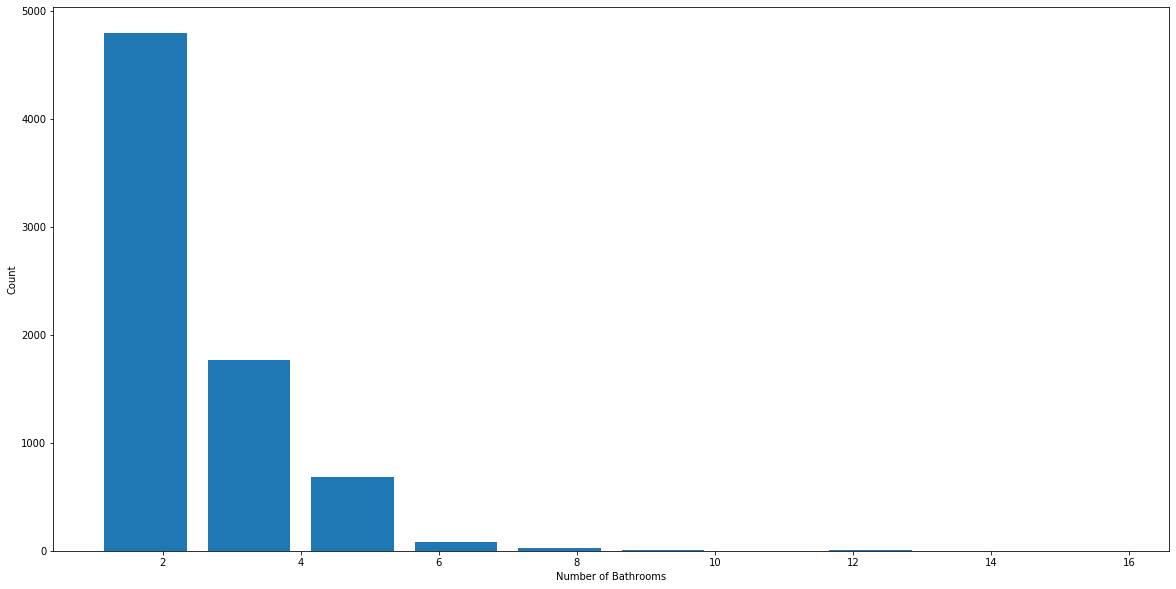

In [50]:
#to remove bathroom outliers, anythime we have no. of bathrooms greater than number of bedrooms + 2, we remove them
plt.hist(df8.bath,rwidth = 0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [51]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
585,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
1642,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5305,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6792,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8476,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [52]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7291, 7)

In [53]:
#dropping size and price_per_squareft column
df10 = df9.drop(["size","price_per_sqft"], axis = "columns")
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [54]:
#Using Pandas one hot encoding
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df11 = pd.concat([df10,dummies.drop('other', axis='columns')],axis='columns')
df11.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
#drop price from our x variable becos x is an independent vairable and price is dependent so price will be our y
X = df12.drop("price",axis = "columns")
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [59]:
#dividing our data set into training and test data set for our model training we use our train and to evaluate the
#performance we use our test data set
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size = 0.2, random_state = 10)

In [61]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [62]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
model.score(X_test, y_test)

0.8556662450161266

In [64]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8556662450161266

In [65]:
#K fold validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2,random_state=0)

cross_val_score(LinearRegression(), X,y, cv=cv)

array([0.84196276, 0.82904236, 0.90136194, 0.85131228, 0.84354632])

In [66]:
#trying out differenet algorithms using grid search cv
#an API provided by Escalon to run our model using different regressors and parameters and give us the best score
#first we create a dictionary
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        "linear_regression" : {
            "model": LinearRegression(),
            "params"  : {
                "normalize": [True, False]
            }
    },
    "lasso": {
        "model": Lasso(),
        "params": {
            "alpha":[1,2],
            "selection": ["random", "cyclic"]
            
        }
    },
    "decision_tree": {
        "model": DecisionTreeRegressor(),
        "params":{
            "criterion" : ["mse", "friedman_mse"],
            "splitter" : ["best","random"]
        }
    }

    }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config["model"], config["params"], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            "model" : algo_name,
            "best_score": gs.best_score_,
            "best_params": gs.best_params_
        })
    return pd.DataFrame(scores, columns = ["model", "best_score", "best_params"])

find_best_model_using_gridsearchcv(X,y)
#we supply x and y as input and using the dictionary it should tell us which algorithm is the best and also the paramater. 
#this is called hyper parameter tuning
#we shuffle our sample using sample split to get a better result
#going through our python dictionary and initiatlising gridsearchcv object with this model as well as this parmenteres 
#for cross validation
#We are using the CV method with 5 whole cross validation
#next we call a fit method which will append (to write more data) the model, best score and best params parameters
#finally we return the resultant (resulting or fianl) score into our dataframe


,model,best_score,best_params
0,linear_regression,0.853445,{'normalize': False}
1,lasso,0.703370,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.676574,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [67]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Block Koramangala', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=257)

In [68]:
#write a funtion that takes (location, sqft, bath and bhk ) as inputs and returns the predicted price
def predict_price (location, total_sqft, bath, bhk):
    loc_index = np.where (X.columns==location)[0][0]
    
    x= np.zeros(len(X.columns))
    x[0] = total_sqft
    x[1] = bath
    x[2] = bhk 
    if loc_index>=0:
        x[loc_index] = 1
        
    return lr_clf.predict([x])[0]

In [69]:
predict_price("1st Phase JP Nagar", 1000, 2, 2)

86.1054361217987

In [70]:
predict_price("1st Phase JP Nagar", 1000, 3, 3)

87.39878275566818

In [71]:
predict_price("Indira Nagar", 1000, 2, 2)

172.16322432857658

In [72]:
predict_price("Indira Nagar", 1000, 3, 3)

173.45657096244605

In [73]:
df12.loc[1]

total_sqft             1630.0
bath                      3.0
price                   194.0
bhk                       3.0
1st Block Jayanagar       1.0
                        ...  
Yelachenahalli            0.0
Yelahanka                 0.0
Yelahanka New Town        0.0
Yelenahalli               0.0
Yeshwanthpur              0.0
Name: 1, Length: 258, dtype: float64

In [73]:
#Here we export our model to a pickle file
import pickle
with open('banglore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(lr_clf,f)
#pickle file does not store our data it only stores the parameters we have defined for manipulating our data

In [74]:
#Here we export our data columns into a .json file
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
    
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))
#col.lower converting everything to lower case